# File Formats

In [3]:
import numpy as np
import pandas as pd
import yaml
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

A lot of structured data isn't in CSV format, but in HTML, XML, JSON, YAML, etc. JSON might have a structure that Pandas can't read directly. Here's an example: a group of people collected information about US congressional legislators in YAML format.

https://github.com/unitedstates/congress-legislators

Here's one of the data files:

https://github.com/unitedstates/congress-legislators/blob/master/legislators-current.yaml

## JSON

In [4]:
elections = pd.read_csv("elections.csv")

In [5]:
for flag in ['split','records','index','columns','values','table']:
    elections.to_json(f"elections_{flag}.json", orient = f'{flag}') 

In [6]:
for flag in ['split','records','index','columns','values','table']:
    with open(f'elections_{flag}.json') as fg:
        exec(f'elections_json_{flag} = json.load(fg)')

In [7]:
elections_json_table

{'schema': {'fields': [{'name': 'index', 'type': 'integer'},
   {'name': 'Candidate', 'type': 'string'},
   {'name': 'Party', 'type': 'string'},
   {'name': '%', 'type': 'number'},
   {'name': 'Year', 'type': 'integer'},
   {'name': 'Result', 'type': 'string'}],
  'primaryKey': ['index'],
  'pandas_version': '0.20.0'},
 'data': [{'index': 0,
   'Candidate': 'Reagan',
   'Party': 'Republican',
   '%': 50.7,
   'Year': 1980,
   'Result': 'win'},
  {'index': 1,
   'Candidate': 'Carter',
   'Party': 'Democratic',
   '%': 41.0,
   'Year': 1980,
   'Result': 'loss'},
  {'index': 2,
   'Candidate': 'Anderson',
   'Party': 'Independent',
   '%': 6.6,
   'Year': 1980,
   'Result': 'loss'},
  {'index': 3,
   'Candidate': 'Reagan',
   'Party': 'Republican',
   '%': 58.8,
   'Year': 1984,
   'Result': 'win'},
  {'index': 4,
   'Candidate': 'Mondale',
   'Party': 'Democratic',
   '%': 37.6,
   'Year': 1984,
   'Result': 'loss'},
  {'index': 5,
   'Candidate': 'Bush',
   'Party': 'Republican',
   '%

## YAML

In [8]:
with open('legislators-current.yaml') as fh:
    legislators = yaml.load(fh)
    len(legislators)

In [9]:
x = legislators[0]
x['id']

{'bioguide': 'B000944',
 'thomas': '00136',
 'lis': 'S307',
 'govtrack': 400050,
 'opensecrets': 'N00003535',
 'votesmart': 27018,
 'fec': ['H2OH13033', 'S6OH00163'],
 'cspan': 5051,
 'wikipedia': 'Sherrod Brown',
 'house_history': 9996,
 'ballotpedia': 'Sherrod Brown',
 'maplight': 168,
 'icpsr': 29389,
 'wikidata': 'Q381880',
 'google_entity_id': 'kg:/m/034s80'}

In [ ]:
legislators

In [11]:
x['name']

{'first': 'Sherrod', 'last': 'Brown', 'official_full': 'Sherrod Brown'}

In [12]:
x['bio']

{'birthday': '1952-11-09', 'gender': 'M'}

In [13]:
def to_date(s):
    return datetime.strptime(s, '%Y-%m-%d')

to_date(x['bio']['birthday'])

datetime.datetime(1952, 11, 9, 0, 0)

In [15]:
leg_df = pd.DataFrame(
    columns=['id', 'first', 'last', 'birthday'],
    data=[[x['id']['bioguide'], 
           x['name']['first'],
           x['name']['last'],
           to_date(x['bio']['birthday'])] for x in legislators])
leg_df.head()

,id,first,last,birthday
0,B000944,Sherrod,Brown,1952-11-09
1,C000127,Maria,Cantwell,1958-10-13
2,C000141,Benjamin,Cardin,1943-10-05
3,C000174,Thomas,Carper,1947-01-23
4,C001070,Robert,Casey,1960-04-13


In [16]:
datetime.now() - leg_df.loc[0, 'birthday']

Timedelta('24433 days 16:23:25.759425')

In [17]:
leg_df['age'] = (datetime.now() - leg_df['birthday']).apply(lambda age: age.days/365)
leg_df.head()

,id,first,last,birthday,age
0,B000944,Sherrod,Brown,1952-11-09,66.939726
1,C000127,Maria,Cantwell,1958-10-13,61.010959
2,C000141,Benjamin,Cardin,1943-10-05,76.043836
3,C000174,Thomas,Carper,1947-01-23,72.739726
4,C001070,Robert,Casey,1960-04-13,59.509589


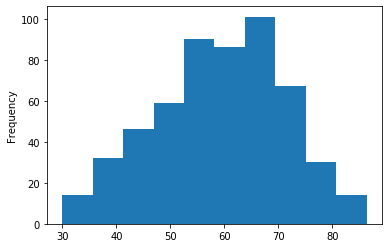

In [18]:
leg_df['age'].plot(kind='hist');

## Joins

In [19]:
comm_path = 'committees-current.yaml'
comm_membership_path = 'committee-membership-current.yaml'
comms = None 
comm_membership = None

In [20]:
with open(comm_path, encoding="utf8") as fh:
    comms = yaml.load(fh)

In [21]:
with open(comm_membership_path) as fh: 
    comm_membership = yaml.load(fh)

In [22]:
print(len(comms), len(comm_membership))

47 217


In [23]:
comms[0]

{'type': 'house',
 'name': 'House Committee on Agriculture',
 'url': 'https://agriculture.house.gov/',
 'minority_url': 'https://democrats-agriculture.house.gov/',
 'thomas_id': 'HSAG',
 'house_committee_id': 'AG',
 'subcommittees': [{'name': 'Conservation and Forestry',
   'thomas_id': '15',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Commodity Exchanges, Energy, and Credit',
   'thomas_id': '22',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'General Farm Commodities and Risk Management',
   'thomas_id': '16',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Livestock and Foreign Agriculture',
   'thomas_id': '29',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
  {'name': 'Biotechnology, Horticulture, and Research',
   'thomas_id': '14',
   'address': '1301 LHOB; Washington, DC 20515',
   'phone': '(202) 225-2171'},
 

In [24]:
comm_df = pd.DataFrame(
    columns=['name', 'thomas_id', 'type'],
    data=[[c['name'], c['thomas_id'], c['type']] for c in comms]
)
comm_df.head()

,name,thomas_id,type
0,House Committee on Agriculture,HSAG,house
1,House Committee on Appropriations,HSAP,house
2,House Committee on Armed Services,HSAS,house
3,House Committee on Financial Services,HSBA,house
4,House Committee on the Budget,HSBU,house


In [100]:
comm_membership.keys()

dict_keys(['HLIG', 'HLIG01', 'HLIG02', 'HLIG03', 'HLIG04', 'HSAG', 'HSAG03', 'HSAG14', 'HSAG15', 'HSAG16', 'HSAG22', 'HSAG29', 'HSAP', 'HSAP01', 'HSAP02', 'HSAP04', 'HSAP06', 'HSAP07', 'HSAP10', 'HSAP15', 'HSAP18', 'HSAP19', 'HSAP20', 'HSAP23', 'HSAP24', 'HSAS', 'HSAS02', 'HSAS03', 'HSAS06', 'HSAS25', 'HSAS26', 'HSAS28', 'HSAS29', 'HSBA', 'HSBA01', 'HSBA04', 'HSBA09', 'HSBA15', 'HSBA16', 'HSBA20', 'HSBU', 'HSED', 'HSED02', 'HSED10', 'HSED13', 'HSED14', 'HSFA', 'HSFA05', 'HSFA07', 'HSFA13', 'HSFA14', 'HSFA16', 'HSFA18', 'HSGO', 'HSGO06', 'HSGO24', 'HSGO25', 'HSGO27', 'HSGO28', 'HSGO29', 'HSHA', 'HSHM', 'HSHM05', 'HSHM07', 'HSHM08', 'HSHM09', 'HSHM11', 'HSHM12', 'HSIF', 'HSIF02', 'HSIF03', 'HSIF14', 'HSIF16', 'HSIF17', 'HSIF18', 'HSII', 'HSII06', 'HSII10', 'HSII13', 'HSII15', 'HSII24', 'HSJU', 'HSJU01', 'HSJU03', 'HSJU05', 'HSJU08', 'HSJU10', 'HSPW', 'HSPW02', 'HSPW05', 'HSPW07', 'HSPW12', 'HSPW13', 'HSPW14', 'HSRU', 'HSRU02', 'HSRU04', 'HSSM', 'HSSM23', 'HSSM24', 'HSSM25', 'HSSM26', 'HS

In [101]:
comm_membership['HSAG'][0]

{'name': 'K. Michael Conaway',
 'party': 'majority',
 'rank': 1,
 'title': 'Chair',
 'thomas': '01805',
 'bioguide': 'C001062'}

In [102]:
member_df = pd.DataFrame(
    columns=['comm_id', 'leg_id'],
    data=[[c, m['bioguide']] for c, members in comm_membership.items() for m in members]
)
member_df.head()

,comm_id,leg_id
0,HLIG,N000181
1,HLIG,C001062
2,HLIG,K000210
3,HLIG,T000463
4,HLIG,W000815


In [103]:
member_comm = member_df.merge(comm_df, left_on='comm_id', right_on='thomas_id')
member_comm.head()

,comm_id,leg_id,name,thomas_id,type
0,HLIG,N000181,House Permanent Select Committee on Intelligence,HLIG,house
1,HLIG,C001062,House Permanent Select Committee on Intelligence,HLIG,house
2,HLIG,K000210,House Permanent Select Committee on Intelligence,HLIG,house
3,HLIG,T000463,House Permanent Select Committee on Intelligence,HLIG,house
4,HLIG,W000815,House Permanent Select Committee on Intelligence,HLIG,house


In [104]:
comm_sizes = member_comm['name'].value_counts()
comm_sizes

House Committee on Armed Services                                 48
House Committee on Energy and Commerce                            48
House Committee on Transportation and Infrastructure              47
House Committee on Appropriations                                 44
House Committee on Financial Services                             43
House Committee on Agriculture                                    40
House Committee on Foreign Affairs                                38
House Committee on Natural Resources                              37
House Committee on Oversight and Reform                           34
House Committee on Science, Space, and Technology                 32
Senate Committee on Appropriations                                31
House Committee on Education and Labor                            30
House Committee on the Judiciary                                  29
House Committee on Ways and Means                                 28
House Committee on the Budget     

In [105]:
df = member_comm.merge(leg_df, left_on='leg_id', right_on='id')
df.head()

,comm_id,leg_id,name,thomas_id,type,id,first,last,birthday,age,religion
0,HLIG,N000181,House Permanent Select Committee on Intelligence,HLIG,house,N000181,Devin,Nunes,1973-10-01,46.030137,None
1,HSWM,N000181,House Committee on Ways and Means,HSWM,house,N000181,Devin,Nunes,1973-10-01,46.030137,None
2,HLIG,C001062,House Permanent Select Committee on Intelligence,HLIG,house,C001062,K.,Conaway,1948-06-11,71.353425,None
3,HSAG,C001062,House Committee on Agriculture,HSAG,house,C001062,K.,Conaway,1948-06-11,71.353425,None
4,HSAS,C001062,House Committee on Armed Services,HSAS,house,C001062,K.,Conaway,1948-06-11,71.353425,None


In [106]:
comm_ages = df['age'].groupby(df['name']).mean().sort_values()
comm_ages

name
House Permanent Select Committee on Intelligence                  55.466210
House Committee on House Administration                           55.577626
Joint Economic Committee                                          55.827945
House Committee on Armed Services                                 57.120373
House Committee on the Budget                                     57.227006
House Committee on Veterans' Affairs                              57.739582
House Committee on Homeland Security                              57.971726
House Committee on the Judiciary                                  58.723666
House Committee on Foreign Affairs                                59.738356
House Committee on Ethics                                         59.772603
House Committee on Oversight and Reform                           59.853666
House Committee on Financial Services                             59.858936
House Committee on Agriculture                                    60.283630
Senate 

In [107]:
leg_df['age'].mean()

59.24362721427306

In [108]:
member_count = member_df['leg_id'].value_counts().to_frame().reset_index()
member_count.head()

,index,leg_id
0,L000174,24
1,S000320,23
2,M000934,22
3,C001047,22
4,U000039,21


In [109]:
member_count.columns = ['id', 'num_comms']
member_count.head()

,id,num_comms
0,L000174,24
1,S000320,23
2,M000934,22
3,C001047,22
4,U000039,21


In [110]:
df = leg_df.merge(member_count, left_on='id', right_on='id')
df.head()

,id,first,last,birthday,age,religion,num_comms
0,B000944,Sherrod,Brown,1952-11-09,66.936986,None,14
1,C000127,Maria,Cantwell,1958-10-13,61.008219,None,16
2,C000141,Benjamin,Cardin,1943-10-05,76.041096,None,14
3,C000174,Thomas,Carper,1947-01-23,72.736986,None,12
4,C001070,Robert,Casey,1960-04-13,59.506849,None,12


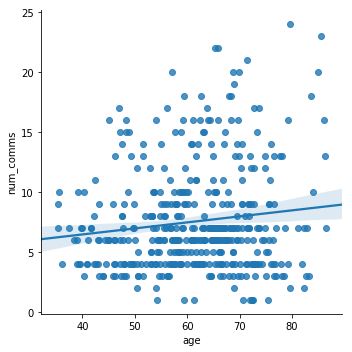

In [115]:
import seaborn as sns
sns.lmplot(x='age', y='num_comms', data=df, fit_reg=True);